해당 내용은 [공식 pytorch 튜토리얼](https://tutorials.pytorch.kr/beginner/basics/intro.html) 의 내용입니다.

In [2]:
import torch
import numpy as np

## 텐서(TENSOR)

### 1) 텐서 초기화

In [6]:
# 데이터로부터 직접 텐서 생성하기
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

# numpy 배열로부터 생성하기
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# 다른 텐서로부터 생성하기
x_one = torch.ones_like(x_data) # x_data 속성 유지
x_rand = torch.randn_like(x_data, dtype=torch.float)


In [7]:
# 무작위 값을 사용하기
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

### 2) 텐서 속성

In [4]:
tensor = torch.rand(3,4)
# tensor = torch.rand(3,4, device="mps")
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 3) 텐서 연산

In [6]:
if torch.backends.mps.is_available():
    tensor = tensor.to("mps")

del tensor

In [7]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [8]:
# 텐서 연결
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [9]:
# 산술 연산
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
# ``tensor.T`` 는 텐서의 전치(transpose)를 반환합니다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print(y1)

# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(z3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### 4) Numpy 변환
cpu 상의 텐서와 numpy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다르 하나도 변경된다

In [11]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [12]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


---

## DATASET 과 DATALOADER
- 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드로부터 분리
- torch.utils.data.DataLoader 와 torch.utils.data.Dataset 을 제공
  - Dataset은 샘플과 정답을 저장
  - DataLoader는 Dataset을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체로 감싼다

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



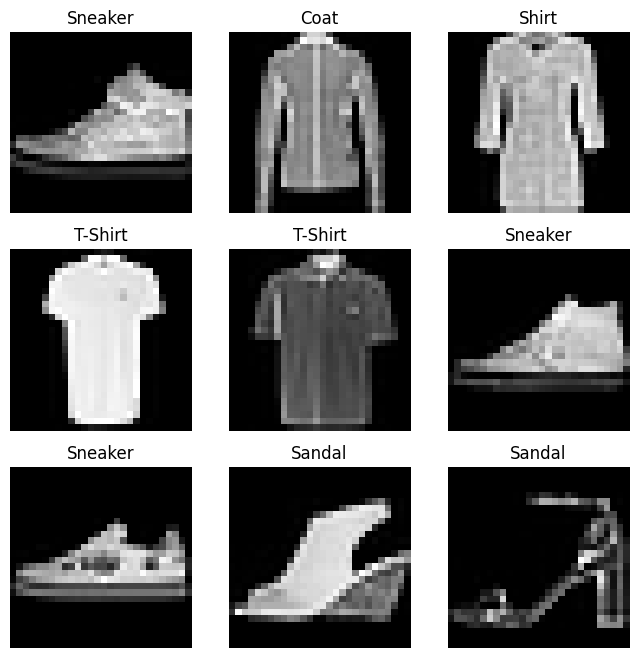

In [4]:
# 데이터셋 순회하고 시각화
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### 1) 사용자 정의 데이터셋 만들기 (Dataset class)
- 사용자 정의 dataset 클래스는 반드시 3개 함수를 구현해야 함
  - \_\_init\_\_ : 데이터셋의 크기를 반환, 이미지와 레이블이 포함된 디렉토리와 변형 작업을 초기화
  - \_\_len\_\_ : 데이터 개수 반환
  - \_\_getitem\_\_ : 데이터와 해당 레이블을 반환, idx를 기반으로 이미지의 위치를 식별하고 이미지를 텐서로 변환하고, 정답을 가져옴

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### 2) DataLoader로 학습용 데이터 준비하기
- Dataset은 데이터의 특징을 가져오고 하나의 샘플에 정답을 지정하는 일을 한다
- 모델을 학습할 때, 일반적으로 샘플들을 미니배치로 전달하고, 매 에폭마다 데이터를 다시 섞어서 과적합을 막고 python의 multiprocessing을 사용하여 데이터 검색 속도를 높인다
- DataLoader는 간단한 api로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체다

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [10]:
train_features, train_labels = next(iter(train_dataloader))
train_features, train_labels

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0118, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

---

## 변형(TRANSFORM)

알고리즘 학습에 필요한 최종 처리가 된 형태로 데이터를 제공하려면 변형을 해서 데이터를 조작하고 학습에 적합하게 만든다

모든 torchvision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체를 받는 매개변수 두개 (feature 변경을 위한 transform과 정답을 변경하기 위한 target_transform) 를 갖는다. torchvision.transforms 모듈은 주로 사용하는 몇가지 변형을 제공

In [11]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
- 10개의 0.0으로 된 초기화된 텐서를 생성하고
- 입력 값인 레이블 y를 텐서로 변환하고
- scatter\_ 메서드를 활용하여 'y'에 해당하는 인덱스에 1을 할당한다

### 1) ToTensor()
ToTensor는 PIL Image나 Numpy ndarry를 floattensor로 변환하고, 이미지의 픽셀의 크기 값을 [0,1] 범위로 비례하여 조정한다.

---

## 신경망 모델 구성하기

신경망은 데이터에 대한 연산을 수행하는 layer/module로 구성되어 있다. 
torch.nn 은 신경망을 구성하는데 필요한 모든 구성 요소를 제공한다.

In [12]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 1) gpu 확인하기

In [13]:
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device

'mps'

### 2) 클래스 정의하기
- 신경망 모델을 nn.Moudel의 하위클래스로 정의하고, \_\_init\_\_ 에서 신경망 계층들을 초기화한다
- nn.Moudel을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현한다

In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='mps:0')


### 3) 모델 계층 (layer)

In [21]:
input_img = torch.rand(3,28,28)
input_img.size()

torch.Size([3, 28, 28])

#### nn.Flatten
- 입력 텐서의 차원을 평탄화하는 역할을 한다
- 여기서 평탄화는 텐서를 1차원으로 변환하는 과정!

In [23]:
flatten = nn.Flatten()
flat_img = flatten(input_img)
flat_img.size()

torch.Size([3, 784])

#### nn.Linear
- 저장된 가중치와 편향을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈

In [24]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_img)
hidden1.size()

torch.Size([3, 20])

#### nn.ReLU
- 비선형 활성화 함수는 모델의 입력과 출력 사이에 복잡한 관계를 만든다
- 비선형 활성화 함수는 선형 변환 후에 적용

In [25]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.8560, -0.0950,  0.0296,  0.2517,  0.2331, -0.3400,  0.0875, -0.3510,
          0.8025, -0.2412, -0.1415,  0.2394,  0.4563, -0.4510,  0.1886,  0.3413,
         -0.7440, -0.5138, -0.3472,  0.4617],
        [-0.8979, -0.0698,  0.0428,  0.8731,  0.4327,  0.3016,  0.0654, -0.1087,
          0.5964, -0.4222, -0.3294,  0.0635, -0.0022, -0.4860,  0.3396,  0.5448,
         -0.3581, -0.2814, -0.4462,  0.1208],
        [-0.9047, -0.3617,  0.0607,  0.6165,  0.2501, -0.0665, -0.0371,  0.0100,
          0.6476, -0.2865,  0.0118,  0.1672,  0.0562, -0.0747,  0.3563,  0.3800,
         -0.7538, -0.5374, -0.4474,  0.2055]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0296, 0.2517, 0.2331, 0.0000, 0.0875, 0.0000, 0.8025,
         0.0000, 0.0000, 0.2394, 0.4563, 0.0000, 0.1886, 0.3413, 0.0000, 0.0000,
         0.0000, 0.4617],
        [0.0000, 0.0000, 0.0428, 0.8731, 0.4327, 0.3016, 0.0654, 0.0000, 0.5964,
         0.0000, 0.0000, 0.0635, 0.0000, 0.0000, 0.33

#### nn.Sequential
- 순서를 갖는 모듈의 컨테이너
- 데이터는 정의된 것과 같은 순소러 모든 모듈들을 통해 전달된다

In [26]:
seq_moduels = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_img = torch.rand(3,28,28)
logits = seq_moduels(input_img)
logits

tensor([[-0.1687,  0.1552, -0.4135,  0.0091, -0.0277, -0.1875,  0.0590, -0.0919,
         -0.3001,  0.0010],
        [-0.1737,  0.2153, -0.4720, -0.0129, -0.0205, -0.1971,  0.1355, -0.0758,
         -0.2340,  0.1128],
        [-0.1056,  0.1191, -0.3214,  0.0310, -0.0106, -0.1843,  0.2879,  0.0095,
         -0.2633,  0.0959]], grad_fn=<AddmmBackward0>)

#### nn.Softmax
- 신경망의 마지막 선형 계층은 nn.Softmax 를 사용하여 모델의 각 분류에 대한 예측 확률을 [0,1] 범위로 나타내도록 조정
- 매개변수는 값의 합이 1

In [27]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.0918, 0.1270, 0.0719, 0.1097, 0.1057, 0.0901, 0.1153, 0.0992, 0.0805,
         0.1088],
        [0.0887, 0.1309, 0.0658, 0.1042, 0.1034, 0.0867, 0.1209, 0.0978, 0.0835,
         0.1181],
        [0.0917, 0.1148, 0.0739, 0.1051, 0.1008, 0.0847, 0.1359, 0.1028, 0.0783,
         0.1121]], grad_fn=<SoftmaxBackward0>)

### 4) 모델 매개변수
신경망 내부의 많은 계층들은 매개변수화 되는데 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어진다. nn.Module을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적되며 모델의 parameters() 및 named_parameters() 메소드로 모든 매개변수에 접근할 수 있게 된다

In [31]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0334, -0.0251, -0.0023,  ...,  0.0218,  0.0250,  0.0108],
        [-0.0131,  0.0087,  0.0158,  ...,  0.0008,  0.0057,  0.0079]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0343, -0.0221], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0328, -0.0096,  0.0326,  ...,  0.0413, -0.0175,  0.0353],
        [-0.0026, -0.0228, -0.0229,  ..., -0.0398, -0.0426,  0.0243]],
       device='mps:0', grad_fn=<Slice

---

## Autograd
신경망을 학습할 때 가장 자주 사용되는 알고리즘은 역전파이다. 이 알고리즘에서 매ㅐㄱ변수는 주어진 매개변수에 대한 손실 함수의 gradient에 따라 조정된다

이러한 gradient를 계산하기 위해 pytorch에는 torch.autograd라고 불리는 자동 미분 엔진이 내장되어 있다. 

In [34]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(z)
print(y)
print(loss)

tensor([ 0.3100, -0.4666,  3.1447], grad_fn=<AddBackward0>)
tensor([0., 0., 0.])
tensor(1.5113, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


![연산 그래프](https://tutorials.pytorch.kr/_images/comp-graph.png)

### 1) Gradient 계산하기
- 신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수를 계산해야 한다
- 도함수를 계산하기 위해 loss.backwaor() 를 호출한 다음 w.grad 와 b.grad 에서 값을 가져온다

In [35]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1923, 0.1285, 0.3196],
        [0.1923, 0.1285, 0.3196],
        [0.1923, 0.1285, 0.3196],
        [0.1923, 0.1285, 0.3196],
        [0.1923, 0.1285, 0.3196]])
tensor([0.1923, 0.1285, 0.3196])


### 2) gradient 추적 멈추기
- 기본적으로, requires_grad=True인 모든 텐서들은 연산 기록을 추적하고 gradient 계산을 지원한다
- 모델을 학습한 뒤 추론으로 사용하려면 (=순전파 연산만 필요한 경우) 연산 코드를 torch.no_grad() 블록으로 둘러싸서 사용해야 한다


멈춰야 하는 이유는 다음과 같다
- 신경망의 일부 매개변수를 고정된 매개변수로 표시
- gradient를 추적하지 않는 텐서의 연사이 더 효율적이기 때문에, 순전파 단계만 수행할 때 연산 속도가 향상된다

In [36]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


동일한 결과를 얻는 다른 방법은 텐서에 detach() 메소드를 사용하는 것이다

In [37]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


---

## Optimization
모델과 데이터가 준비되었으니, 데이터에 매개변수를 최적화하여 모델을 학습하고, 검증하고, 테스트할 차례다. 모델을 학습하는 과정은 반복적인 과정을 거친다. 

각 반복 단계에서 모델을 출력을 추측하고, 추측과 정답 사이의 오류(loss)를 계산하고, 매개변수에 대한 ㅣoss의 도함수를 계산한 뒤 경사하강법을 사용하여 이 파라미터들을 최적화(optimize)한다. 

In [39]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 1) 하이퍼파라미터

하이퍼파라미터는 모델 최적화 과정을 제어할 수 있는 조절 가능한 매개변수이다.

학습 시에는 다음과 같은 하이퍼파라미터를 정의한다
- epoch 수 : 데이터셋을 반복하는 횟수
- batch size : 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수
- learning rate : 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 원하는 최적의 값을 벗어날 수도 있음

In [40]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### 2) 최적화 단계
하이퍼파라미터를 설정한 뒤에는 최적화 단계를 통해 모델을 학습하고 최적화할 수 있다. 최적화 단계의 각 반복(iteration)을 epoch라고 부른다

하나의 에폭은 다음 두 부분으로 구성된다
- 학습 단계 : 학습용 데이터셋을 반복하고 최적의 매개변수로 수렴
- 검증/테스트 단계 : 모델 성능이 개선되고 있는지를 확인하기 위해 테스트 데이터셋을 반복

#### 손실 함수(loss fuction)
- 손실 함수는 예측 결과와 실제 값 사이의 틀린 정도를 측정하여 이 정도를 최소화하려고 한다
- 주어진 데이터 입력으로 계산한 예측과 정답을 비교하여 loss를 계산한다
- 일반적으로 회귀 문제는 nn.MSELoss(평균 제곱 오차(MSE; Mean Square Error)) 분류에는 nn.LogSoftmax와 nn.NLLLoss를 합친 nn.CrossEntropyLoss 등이 있다

In [41]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

#### 옵티마이저(Optimizer)
최적화는 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정하는 과정이다. 최적화 알고리즘은 이 과정이 수행되는 방식을 정의한다.

모든 최적화 절차는 optimizer 객체에 캡슐화된다. 

In [42]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

학습 단계에서 최적화는 세단계로 이루어진다.
- optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정한다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정한다.
- loss.backwards()를 호출하여 예측 손실(prediction loss)을 역전한다. PyTorch는 각 매개변수에 대한 손실의 변화도를 저장한다.
- 변화도를 계산한 뒤에는 optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정한다.

In [43]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 2
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.294617  [   64/60000]
loss: 2.280015  [ 6464/60000]
loss: 2.262619  [12864/60000]
loss: 2.255829  [19264/60000]
loss: 2.223282  [25664/60000]
loss: 2.193916  [32064/60000]
loss: 2.199421  [38464/60000]
loss: 2.164192  [44864/60000]
loss: 2.167379  [51264/60000]
loss: 2.110047  [57664/60000]
Test Error: 
 Accuracy: 45.0%, Avg loss: 2.117801 

Epoch 2
-------------------------------
loss: 2.143735  [   64/60000]
loss: 2.120496  [ 6464/60000]
loss: 2.059710  [12864/60000]
loss: 2.067012  [19264/60000]
loss: 2.001487  [25664/60000]
loss: 1.942121  [32064/60000]
loss: 1.955504  [38464/60000]
loss: 1.878235  [44864/60000]
loss: 1.897490  [51264/60000]
loss: 1.781241  [57664/60000]
Test Error: 
 Accuracy: 50.9%, Avg loss: 1.804894 

Done!


----

## 모델 저장하고 불러오기

pytorch 모델은 학습한 매개변수를 state_dict라고 불리는 내부 상태 사전에 저장한다. 이 상태 값들은 torch.save 메소드를 사용하여 저장할 수 있다

In [45]:
import torchvision.models as models

model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/journey/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


모델 가중치를 불러오기 위해서는 동일한 모델의 인스턴스를 생성한 다음에 load_state_dict() 메소드를 사용하여 매개변수들을 불러온다

In [46]:
model = models.vgg16() # 여기서는 ``weights`` 를 지정하지 않았으므로, 학습되지 않은 모델을 생성합니다.
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

### 1) 모델의 형태를 포함하여 저장하고 불러오기
모델 클래스의 구조를 모델과 함께 저장하고 싶으면 model을 저장 함수에 전달한다

In [47]:
torch.save(model, 'model.pth')

In [48]:
model = torch.load('model.pth')